In [ ]:
!pip install -q yfinance
!pip install matplotlib
!pip install seaborn
!pip install pandas_datareader
!pip install -U scikit-learn scipy matplotlib
!pip install keras
!pip install tensorflow

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The stocks we'll use for this analysis
tech_list = ['MSFT', 'NVDA', 'ADBE', 'INTC', 'CSCO']
minig_list = ['XOM', 'CVX', 'BHP', 'BP', 'ENB']
prod_list = ['HON', 'LMT', 'CAT', 'UNP', 'UPS']
finnance_list = ['JPM', 'BAC', 'C', 'GS', 'MS']
food_list = ['KO', 'PEP', 'PG', 'UL', 'GIS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data and assign to variables
NVDA = yf.download('NVDA', start, end)
MSFT = yf.download('MSFT', start, end)
ADBE = yf.download('ADBE', start, end)
INTC = yf.download('INTC', start, end)
CSCO = yf.download('CSCO', start, end)

XOM = yf.download('XOM', start, end)
CVX = yf.download('CVX', start, end)
BHP = yf.download('BHP', start, end)
BP = yf.download('BP', start, end)
ENB = yf.download('ENB', start, end)

HON = yf.download('HON', start, end)
LMT = yf.download('LMT', start, end)
CAT = yf.download('CAT', start, end)
UNP = yf.download('UNP', start, end)
UPS = yf.download('UPS', start, end)

JPM = yf.download('JPM', start, end)
BAC = yf.download('BAC', start, end)
C = yf.download('C', start, end)
GS = yf.download('GS', start, end)
MS = yf.download('MS', start, end)

KO = yf.download('KO', start, end)
PEP = yf.download('PEP', start, end)
PG = yf.download('PG', start, end)
UL = yf.download('UL', start, end)
GIS = yf.download('GIS', start, end)

# Create a list of company dataframes
tech_company_list = [MSFT, NVDA, ADBE, INTC, CSCO]
tech_company_name = ['Microsoft Corporation', 'NVIDIA Corporation', 'Adobe Inc.', 'Intel Corporation', 'Cisco Systems, Inc.']

mining_company_list = [XOM, CVX, BHP, BP, ENB]
mining_company_name = ['Exxon Mobil Corporation', 'Chevron Corporation', 'BHP Group', 'BP p.l.c.', 'Enbridge Inc.']

prod_company_list = [HON, LMT, CAT, UNP, UPS]
prod_company_name = ['Honeywell International Inc.', 'Lockheed Martin Corporation', 'Caterpillar Inc.', 'Union Pacific Corporation', 'United Parcel Service, Inc.']

finance_company_list = [JPM, BAC, C, GS, MS]
finance_company_name = ['JPMorgan Chase & Co.', 'Bank of America Corporation', 'Citigroup Inc.', 'The Goldman Sachs Group, Inc.', 'Morgan Stanley']

food_company_list = [KO, PEP, PG, UL, GIS]
food_company_name = ['The Coca-Cola Company', 'PepsiCo, Inc.', 'Procter & Gamble Company', 'Unilever PLC', 'General Mills, Inc.']

for company, com_name in zip(tech_company_list, tech_company_name):
    company["company_name"] = com_name
df_tech = pd.concat(tech_company_list, axis=0)

for company, com_name in zip(mining_company_list, mining_company_name):
    company["company_name"] = com_name
df_mining = pd.concat(mining_company_list, axis=0)

for company, com_name in zip(prod_company_list, prod_company_name):
    company["company_name"] = com_name
df_prod = pd.concat(prod_company_list, axis=0)

for company, com_name in zip(finance_company_list, finance_company_name):
    company["company_name"] = com_name
df_finance = pd.concat(finance_company_list, axis=0)

for company, com_name in zip(food_company_list, food_company_name):
    company["company_name"] = com_name
df_food = pd.concat(food_company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [68]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,263.353426,266.488406,260.515737,263.683307,262.325838,2.890738e+07
std,27.225765,27.087672,27.413768,27.392486,27.714082,1.017690e+07
min,217.550003,220.410004,213.429993,214.250000,212.649246,9.200800e+06
25%,243.160004,245.305000,240.264999,242.354996,240.913612,2.249105e+07
50%,256.750000,259.880005,253.389999,256.720001,254.371185,2.666030e+07
75%,279.575012,283.204987,277.414993,280.654999,279.681503,3.204340e+07
max,335.329987,338.559998,334.660004,335.940002,335.940002,8.610200e+07


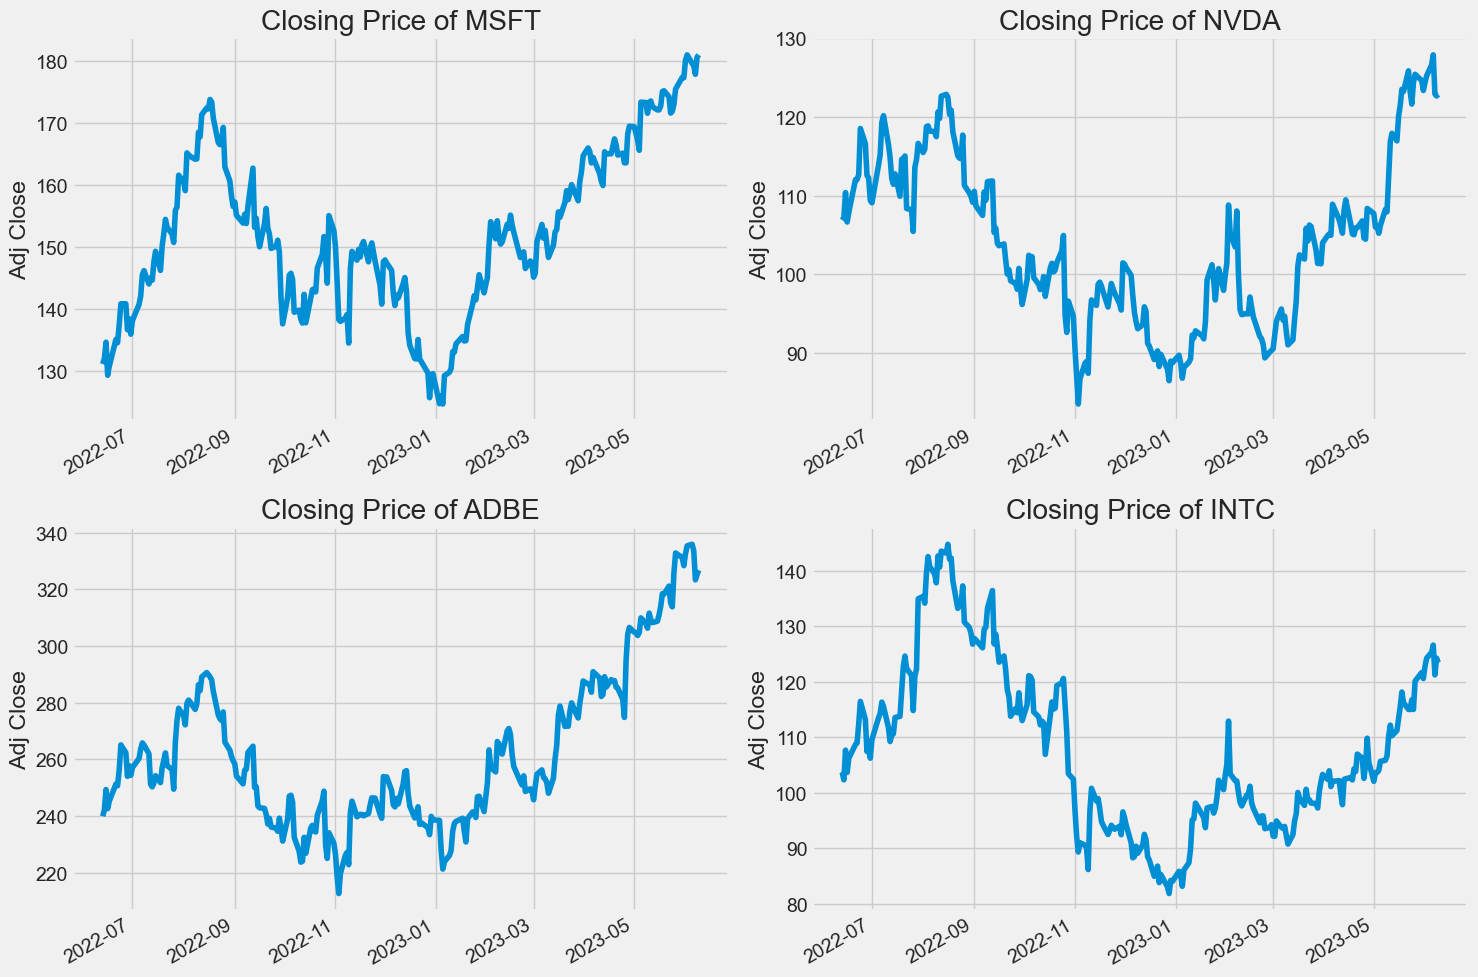

In [74]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

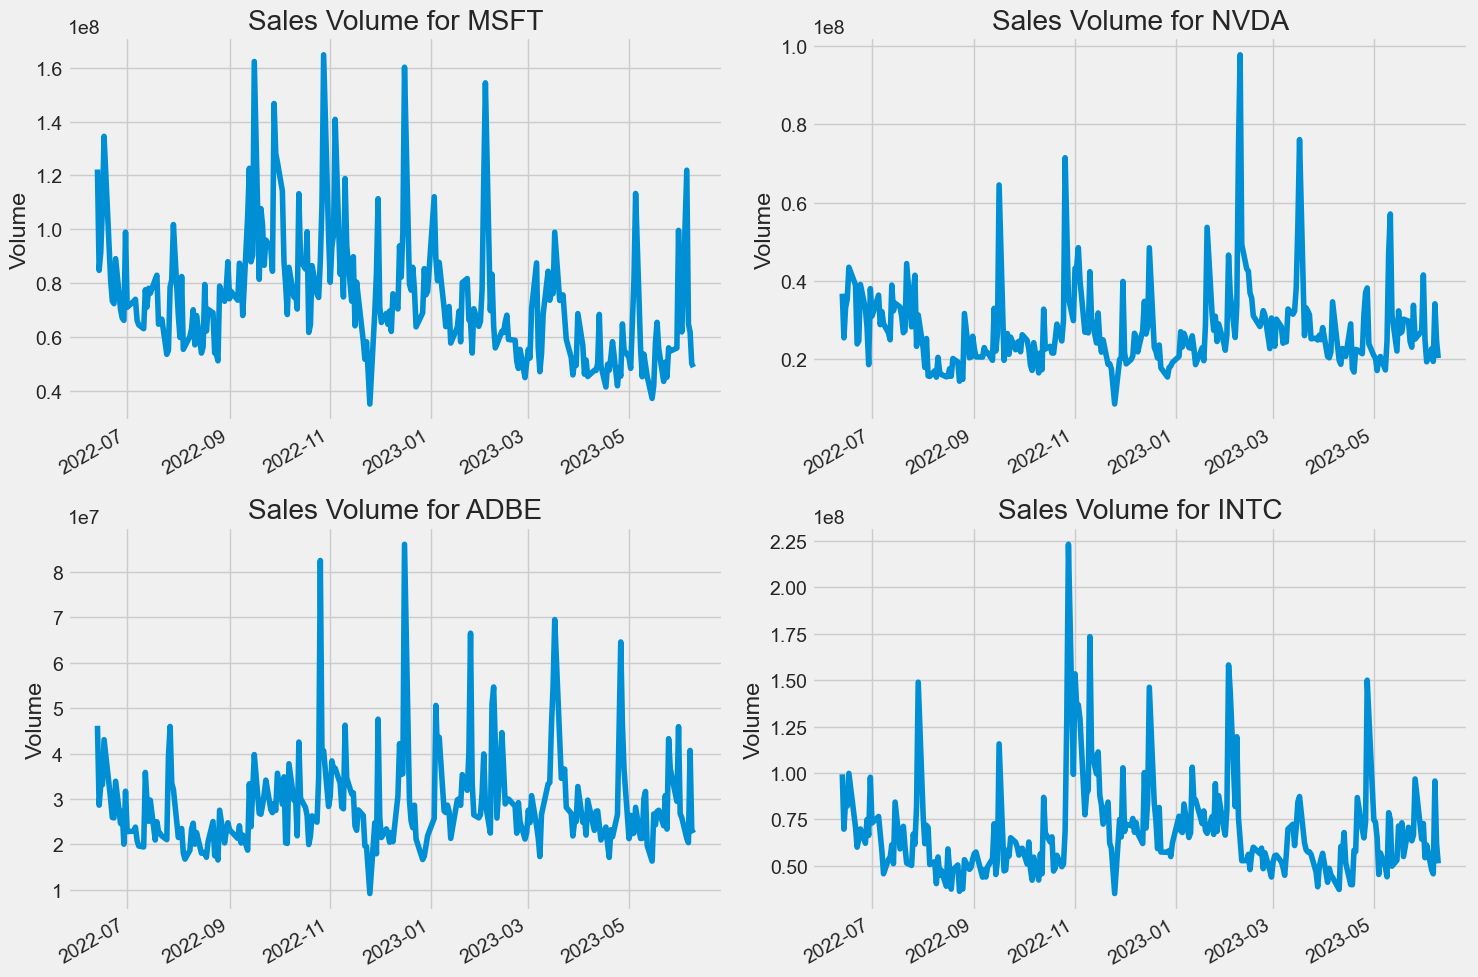

In [72]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Correlation between different stocks closing prices


In [79]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  5 of 5 completed


,ADBE,CSCO,INTC,MSFT,NVDA
Date,,,,,
2022-06-13,NaN,NaN,NaN,NaN,NaN
2022-06-14,-0.002233,-0.007632,0.004236,0.009205,0.012079
2022-06-15,0.016450,0.020741,0.018982,0.029735,0.043635
2022-06-16,-0.031413,-0.010959,-0.033894,-0.026970,-0.056030
2022-06-17,-0.011751,0.001616,-0.009909,0.010940,0.017884


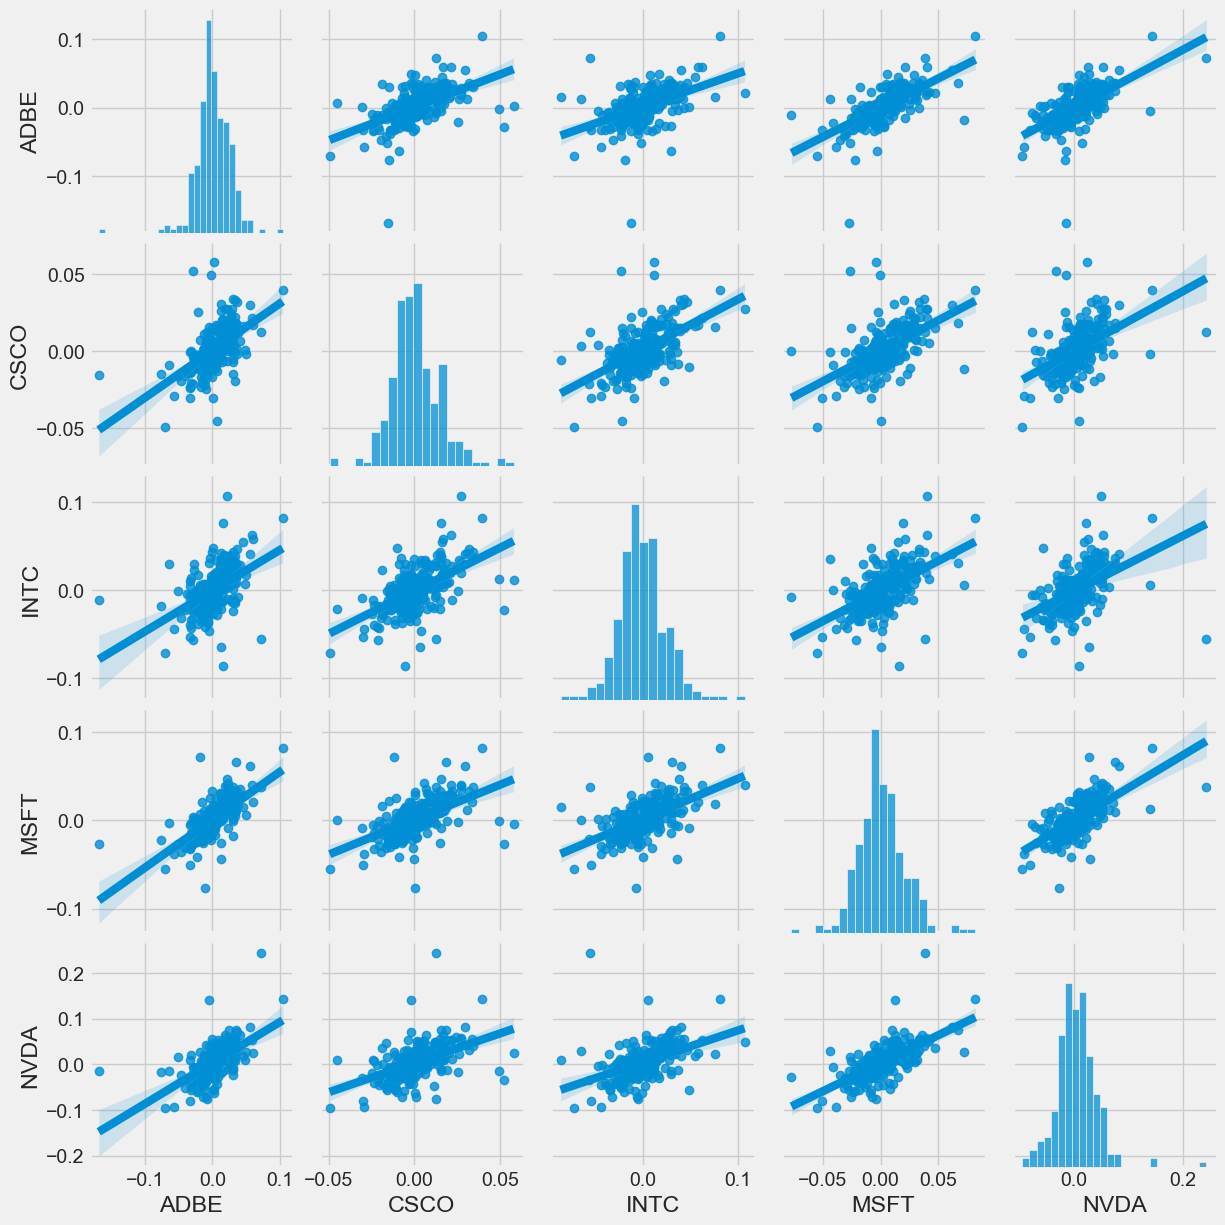

In [80]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

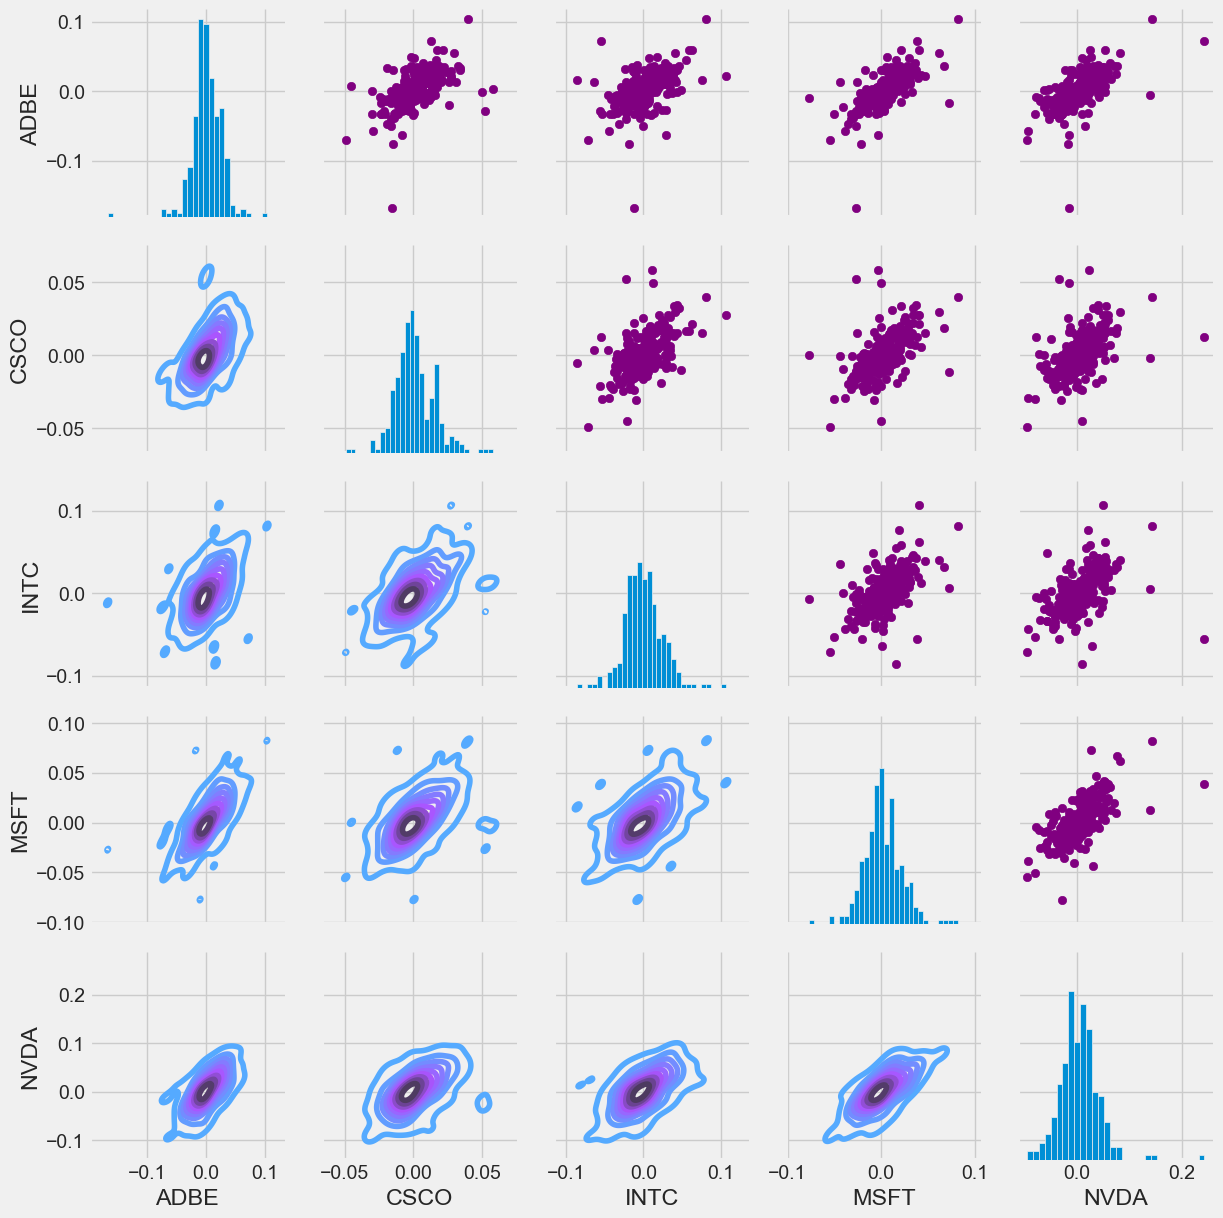

In [81]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

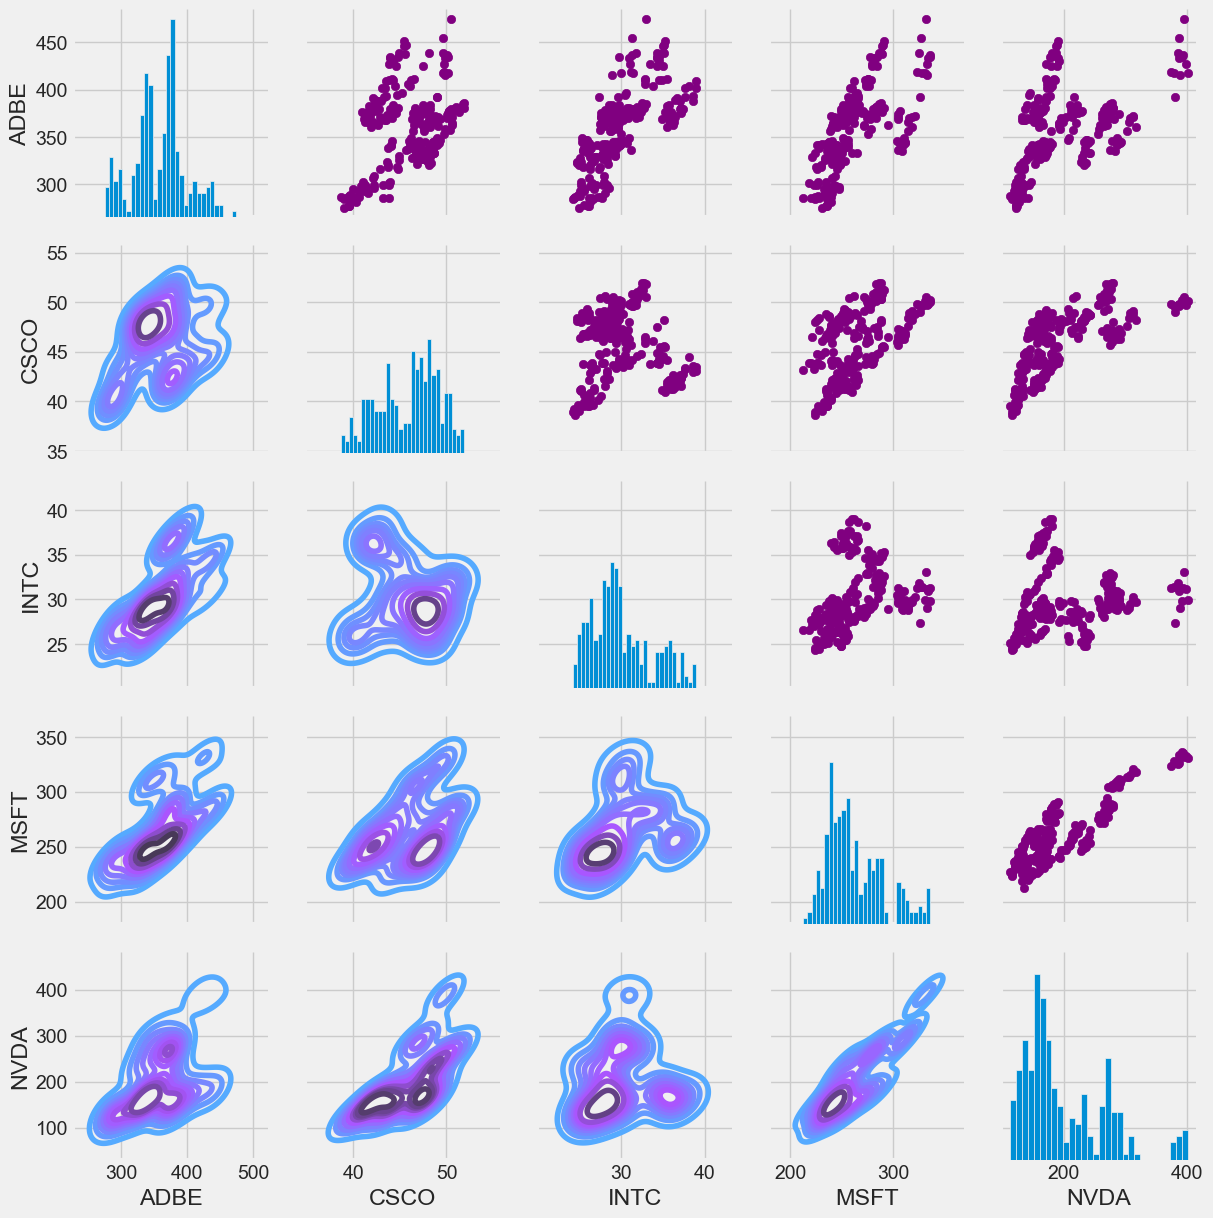

In [82]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

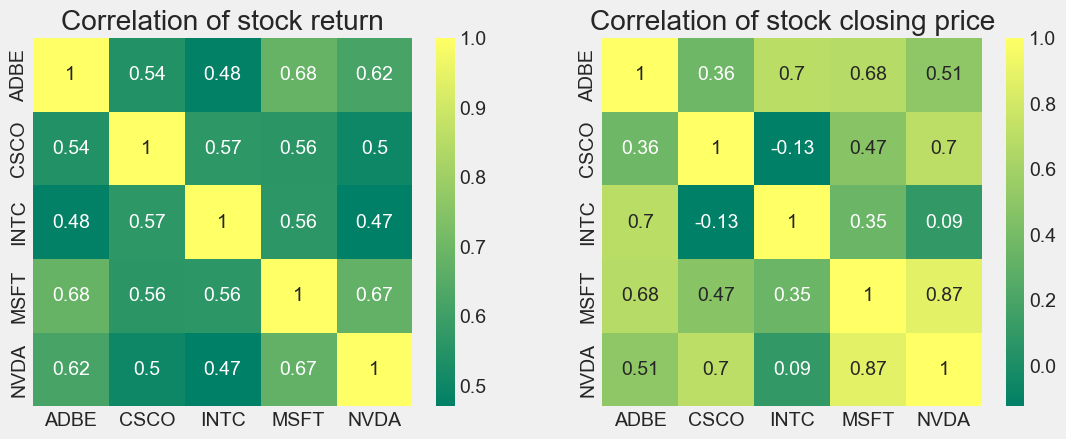

In [83]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

RiscType

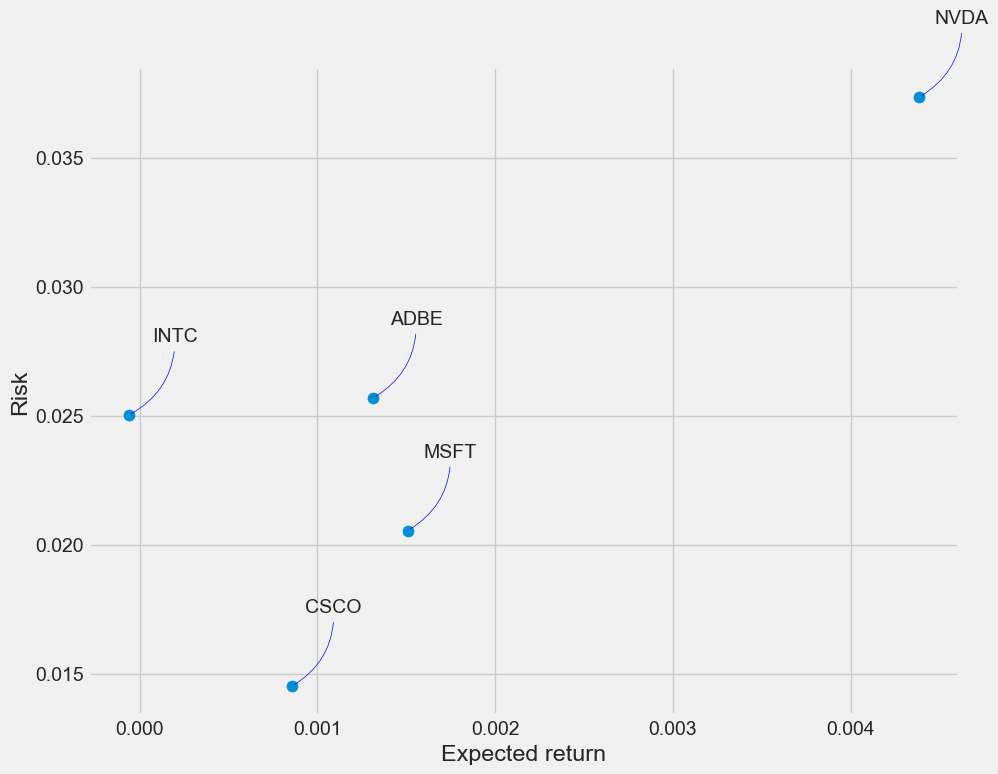

In [84]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicting stock price (Here we can choose the cooncrete ticker)

In [89]:
# Get the stock quote
df = pdr.get_data_yahoo('CSCO', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,18.549999,18.860001,18.480000,18.629999,13.218171,41236600
2012-01-04,18.440001,19.000000,18.350000,18.990000,13.473601,52927700
2012-01-05,18.930000,19.000000,18.670000,18.920000,13.423938,37865300
2012-01-06,18.950001,19.000000,18.830000,18.850000,13.374269,27796900
2012-01-09,18.870001,19.100000,18.790001,18.969999,13.459412,37811500
...,...,...,...,...,...,...
2023-06-06,49.790001,49.910000,49.139999,49.810001,49.810001,16029600
2023-06-07,49.700001,50.139999,49.650002,49.779999,49.779999,15950600
2023-06-08,49.919998,50.000000,49.570000,49.680000,49.680000,13289100


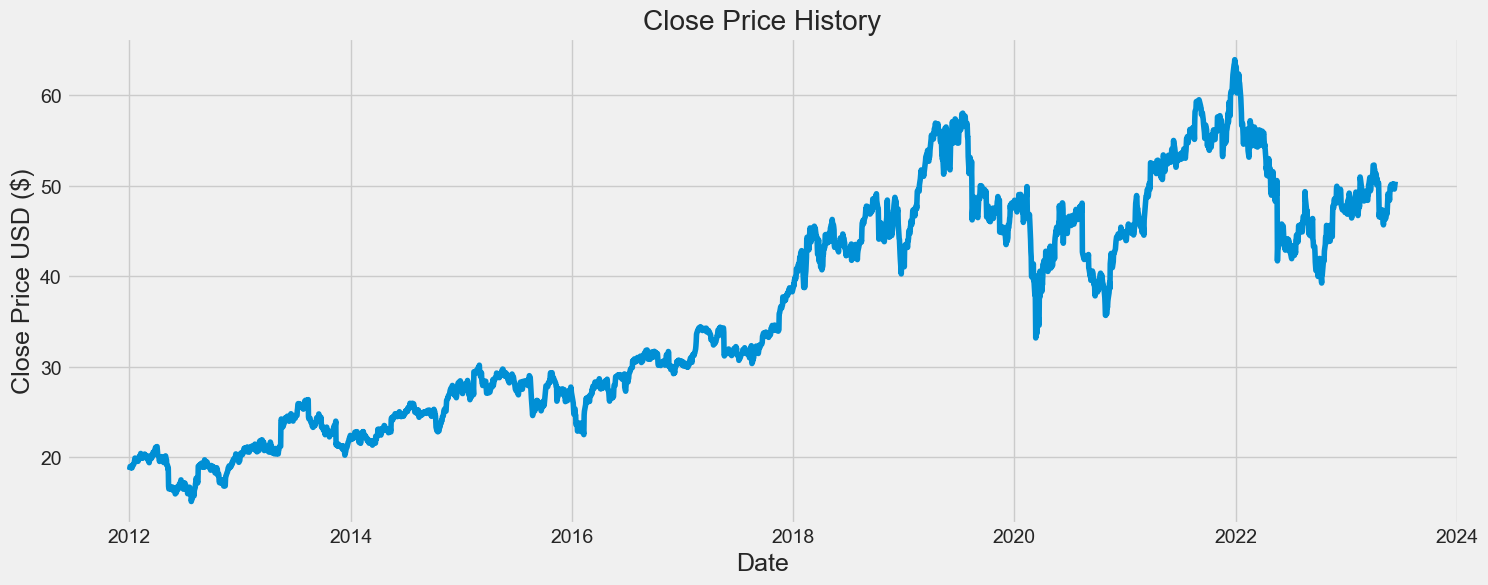

In [90]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [91]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.07186731, 0.07923833, 0.07780508, 0.07637184, 0.07882882,
       0.07596233, 0.08087633, 0.08251433, 0.08067157, 0.08579033,
       0.09049961, 0.09561837, 0.0982801 , 0.09643735, 0.09623259,
       0.09643735, 0.09643735, 0.09090908, 0.09090908, 0.09275184,
       0.09582308, 0.09582308, 0.10176086, 0.10380837, 0.10401312,
       0.10872237, 0.0999181 , 0.09787059, 0.10053237, 0.10135135,
       0.09807535, 0.10380837, 0.10585588, 0.10728912, 0.10237512,
       0.10462735, 0.10278459, 0.10339886, 0.10401312, 0.09746108,
       0.09746108, 0.0950041 , 0.0917281 , 0.08927108, 0.08783784,
       0.0933661 , 0.09582308, 0.09643735, 0.10442259, 0.10401312,
       0.09807535, 0.10053237, 0.10278459, 0.11158886, 0.11015561,
       0.10769859, 0.11076988, 0.11711712, 0.11855037, 0.12203112])]
[0.12100738939442673]

[array([0.07186731, 0.07923833, 0.07780508, 0.07637184, 0.07882882,
       0.07596233, 0.08087633, 0.08251433, 0.08067157, 0.08579033,
       0.09049961, 0.09561837, 0.09

Prediction

In [92]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 14ms/step


1.0801503644857917

C:\Users\bakur\AppData\Local\Temp\ipykernel_1768\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


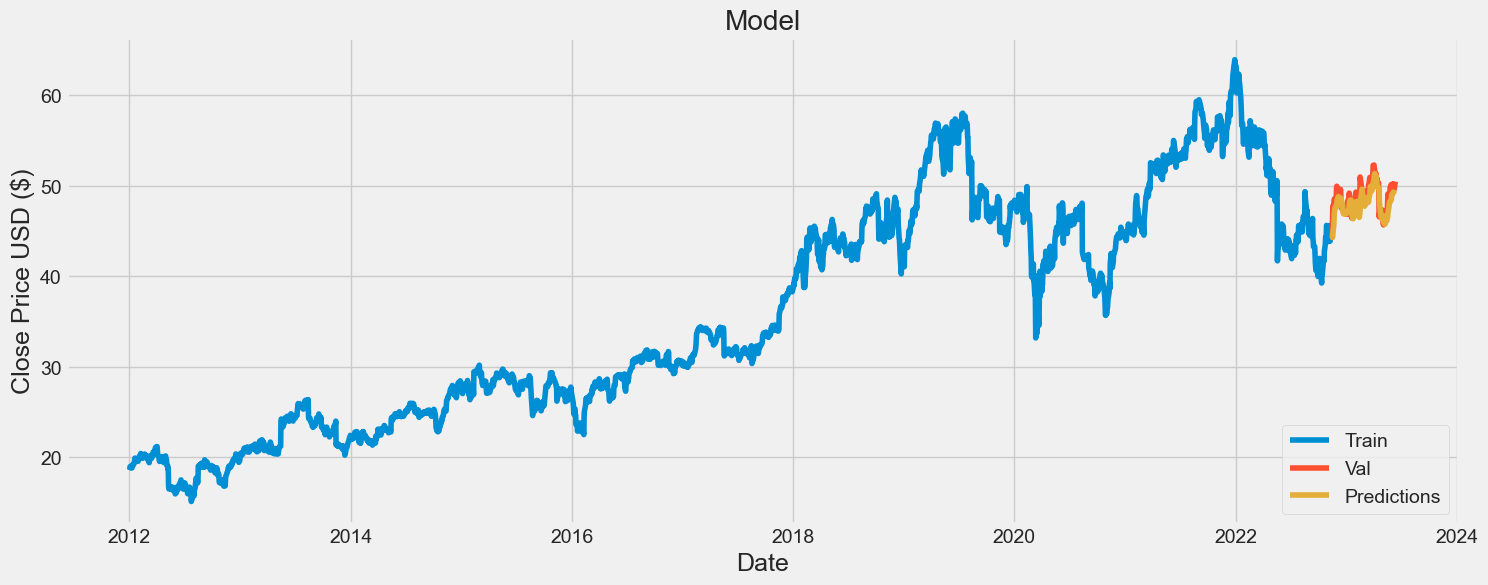

In [93]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()